In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [5]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum()
    


In [8]:
df_skill_lists

,job_title_short,job_skills,excel,sql,python,r,aws,airflow
0,Data Analyst,"[excel, sql, python]",1,1,1,0,0,0
1,Data Scientist,"[python, r]",0,0,1,1,0,0
2,Data Engineer,"[aws, python, airflow]",0,0,1,0,1,1
Total,Data AnalystData ScientistData Engineer,"[excel, sql, python, python, r, aws, python, a...",1,1,3,1,1,1


In [7]:
df_skill_lists.explode('job_skills')

,job_title_short,job_skills,excel,sql,python,r,aws,airflow
0,Data Analyst,excel,1,1,1,0,0,0
0,Data Analyst,sql,1,1,1,0,0,0
0,Data Analyst,python,1,1,1,0,0,0
1,Data Scientist,python,0,0,1,1,0,0
1,Data Scientist,r,0,0,1,1,0,0
2,Data Engineer,aws,0,0,1,0,1,1
2,Data Engineer,python,0,0,1,0,1,1
2,Data Engineer,airflow,0,0,1,0,1,1
Total,Data AnalystData ScientistData Engineer,excel,1,1,3,1,1,1
Total,Data AnalystData ScientistData Engineer,sql,1,1,3,1,1,1


<Axes: xlabel='job_skills'>

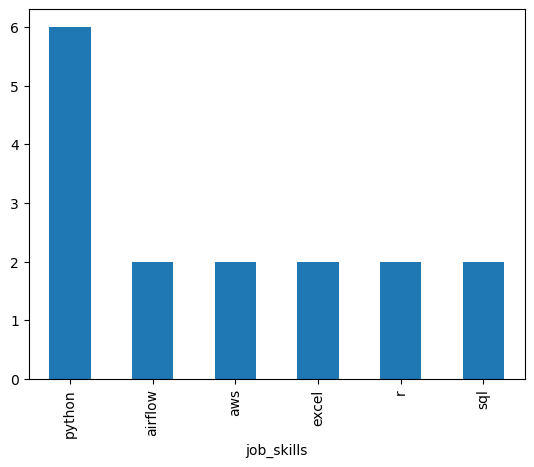

In [9]:
df_skill_lists.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [14]:

# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills')

In [15]:

df_exploded['job_skills']

0                                                      None
1         ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2         ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3         ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4         ['bash', 'python', 'oracle', 'aws', 'ansible',...
                                ...                        
785736    ['bash', 'python', 'perl', 'linux', 'unix', 'k...
785737                       ['sas', 'sas', 'sql', 'excel']
785738                              ['powerpoint', 'excel']
785739    ['python', 'go', 'nosql', 'sql', 'mongo', 'she...
785740                                      ['aws', 'flow']
Name: job_skills, Length: 785741, dtype: object

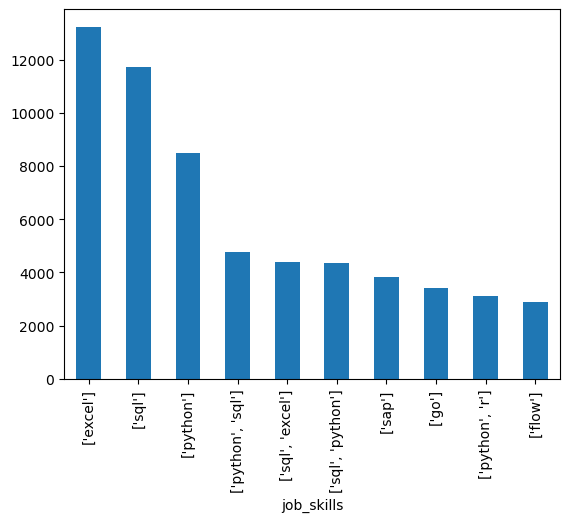

In [12]:

df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()

In [16]:

# Explode job_skills column
df_skills = df_skills.explode('job_skills')

In [17]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short
airflow     Data Engineer      1
aws         Data Engineer      1
excel       Data Analyst       1
python      Data Analyst       1
            Data Engineer      1
            Data Scientist     1
r           Data Scientist     1
sql         Data Analyst       1
dtype: int64

In [19]:
df_skills_count=skills_count.reset_index(name='skill_count')
df_skills_count= df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


In [ ]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count

In [34]:
job_title = 'Data Analyst'
head_value = 3

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
2,excel,Data Analyst,1
3,python,Data Analyst,1
7,sql,Data Analyst,1


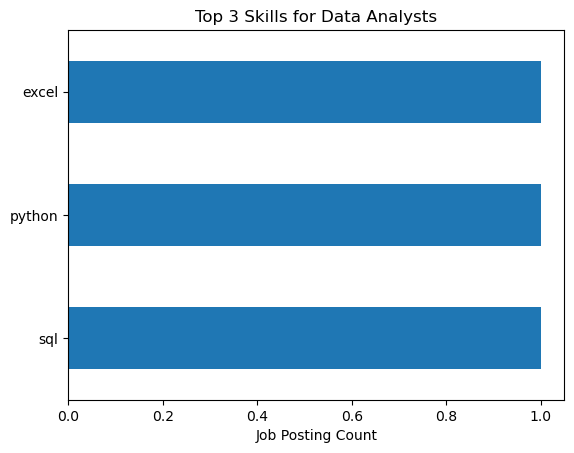

In [31]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()